<a href="https://colab.research.google.com/github/Davidjr2889/Davidjr2889/blob/main/Credit_risk_dataset_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTUDO DE RISCO DE CREDITO**

O risco de crédito nada mais é do que a possibilidade de inadimplência que pode ocorrer em uma transação financeira. Quando uma pessoa ou empresa se dirige ao banco — para a tomada de um empréstimo, por exemplo —, antes de concedê-lo, a instituição faz uma análise do perfil do candidato e seu risco para o banco.

Para fazer essa análise de risco, a organização verifica se o tomador sempre honrou seus compromissos no mercado ou se em algum momento deixou de pagar suas dívidas.

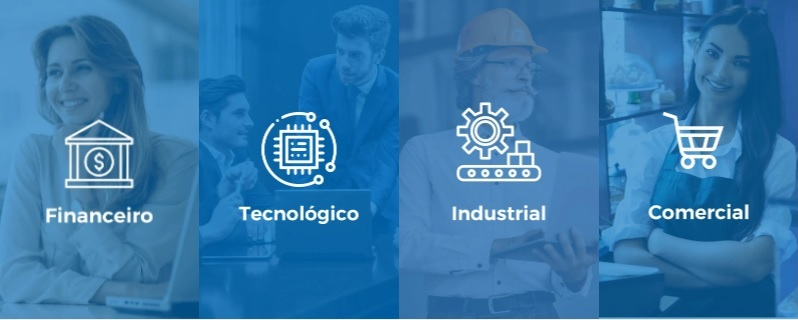


A proporção de brasileiros endividados encerrou o ano de 2021 em patamar recorde, segundo a CNC (Confederação Nacional do Comércio de Bens, Serviços e Turismo). Em dezembro, 76,3% possuíam dívidas, maior patamar da série histórica iniciada em janeiro de 2010, de acordo com os dados da Peic (Pesquisa de Endividamento e Inadimplência do Consumidor) divulgada hoje.

Na média do ano, 70,9% das famílias estavam endividadas, um aumento de 4,4 pontos porcentuais em relação aos 66,5% registrados na média de 2020. "A taxa de incremento de famílias com dívidas também foi a maior já observada, revelando que as famílias recorreram mais ao crédito para sustentar o consumo", apontou a CNC, em nota à imprensa. A pesquisa da CNC considera como dívidas as contas a pagar em cartão de crédito, cheque especial, cheque pré-datado, crédito consignado, crédito pessoal, carnês, financiamento de carro e financiamento de casa, entre outras modalidades. Embora o endividamento tenha aumentado, houve pequena redução na inadimplência em 2021. O porcentual de famílias com contas ou dívidas em atraso diminuiu 0,3 ponto porcentual, de uma média de 25,5% em 2020 para 25,2% no ano passado. No mês de dezembro, porém, o total de inadimplentes foi mais elevado: 26,2%.
"Após iniciar 2021 em patamar superior ao observado no fim de 2020, o indicador reduziu-se até maio, mas passou a apresentar tendência de alta desde então, encerrando o ano em 26,2% das famílias, acima da média anual", ponderou a CNC no estado. "Apesar de a proporção de famílias com contas/dívidas atrasadas ter acirrado no último trimestre do ano, vale notar que o máximo já observado no percentual do indicador ocorreu em agosto de 2020, quando alcançou 26,7%", afirmou. A proporção de famílias que declararam não ter condições de pagar suas contas em atraso e que, portanto, permaneceriam inadimplentes, diminuiu de 11,0% na média de 2020 para 10,5% em 2021.

# Importando dados

Os dados que usaremos neste projeto, foram disponibilizados por um site de base de dados estatisticas como Keagle.
O objetivo da análise é buscar relações estatísticas que possam nos dar alguns insights sobre o risco de crédito tanto para credores quanto para tomadores. Dado que as variáveis e o contexto do conjunto de dados não estão totalmente explicados, não vamos levar em consideração eventos macroeconômicos externos, que poderiam alterar completamente os resultados da análise. Por exemplo, diferentes países podem ter exigências de empréstimos diferentes, ou diferentes fases do ciclo econômico podem terminar em um cenário muito diferente. Portanto, o objetivo da análise é puramente descritivo e deve ser adaptado de acordo com as circunstâncias.*Texto em itálico*

## IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
# Ocultar alarmes
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Bibliotecas para manipulação de séries e dataframe 
import pandas as pd
import numpy as np

# Bibliotecas para representações gráficas.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier


# LEITURA DA BASE DE DADOS

In [3]:
# Nome do nosso dataset("data")
data = pd.read_csv('credit_risk_dataset.csv')

## VISUALIZAÇÃO DO DATAFRAME

In [4]:
# Vamos visualizar as primeiras 3 linhas do nosso dataset
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


## OBTER INFORMAÇOES GERAIS SOBRE O DATASET

In [5]:
# Chekeando o tamanho do dataset
print('features:\t{}'.format(data.shape[1]))
print('entries:\t{}'.format(data.shape[0]))

# chequeando o typo de variaveis
display(data.info())


features:	12
entries:	32581
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

Podemos observar que nao existem dados faltantes mas, por segurança vamos executar o proximo codigo.

## CHAMAMOS E SOMAMOS TODOS OS DADOS FALTANTES POR CATEGORIA

In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

podemos observar que existem dados faltantes dentro do dataset

## VISUALIZANDO ALGUMAS ESTATISTICAS

usando o metodo describe(), podemos visualizar uma distribuição estatistica do dataframe. usando esse metodo podemos obter informação que pode auxiliarmos:



1.   Identifica outliers
2.   Entender a distribuição de dados
3.   Identificar falhas na distribuição de dados








In [7]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
data.loc[data['person_age'] >=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


## VERIFICAÇÃO DE DISTRIBUIÇÃO DA VARIAVEL TARGET
## E VISUALIZANDO DADOS EM CRU

0    25473
1     7108
Name: loan_status, dtype: int64
\Inadiplencia representa. 21.82% of Dataset.



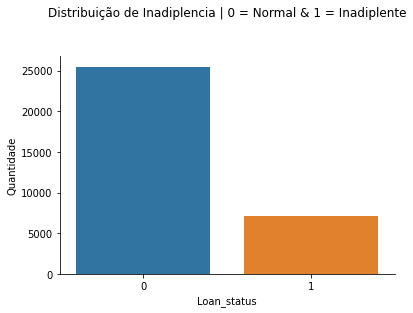

In [9]:
print(data.loan_status.value_counts())
print('\Inadiplencia representa. {:.2f}% of Dataset.\n'.format((data[data.loan_status == 1].shape[0] / data.shape[0])*100))

fig, ax = plt.subplots()
sns.countplot('loan_status', data=data, ax=ax)
ax.set_title('Distribuição de Inadiplencia | 0 = Normal & 1 = Inadiplente', pad=40)
ax.set_xlabel('Loan_status')
ax.set_ylabel('Quantidade')

sns.despine(fig)
plt.show()

## PODEMOS IDENTIFICAR QUANTIDADE DE INADIPLENTES E NAO INADIPLENTE POR IDADE POR MEDIO DE DISTRIBUIÇÃO CONTRIBUINDO COM A ANALISE

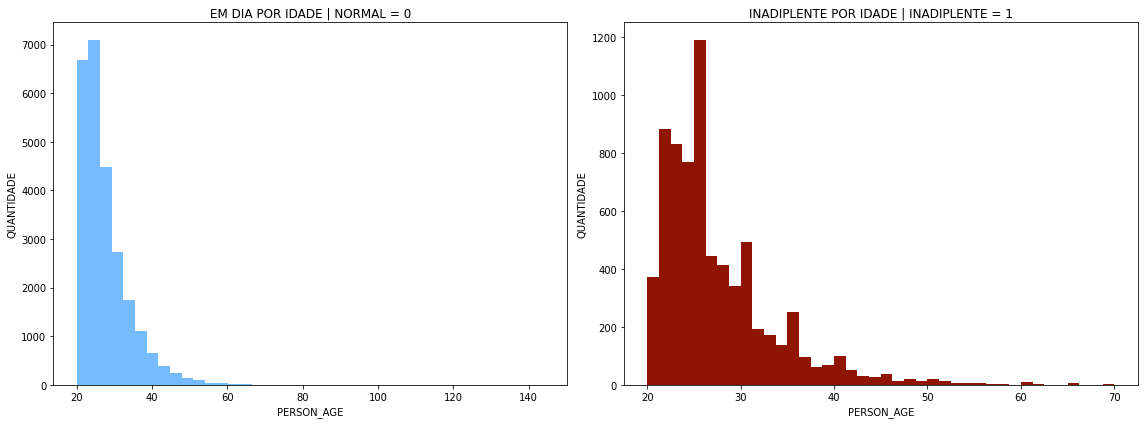

In [10]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
num_bins = 40

ax[0].hist(data.person_age[data.loan_status == 0], bins=num_bins, color='#75bbfd' )
ax[0].set_title('EM DIA POR IDADE | NORMAL = 0')
ax[0].set_xlabel('PERSON_AGE')
ax[0].set_ylabel('QUANTIDADE')

ax[1].hist(data.person_age[data.loan_status == 1], bins=num_bins, color='#8f1402' )
ax[1].set_title('INADIPLENTE POR IDADE | INADIPLENTE = 1')
ax[1].set_xlabel('PERSON_AGE')
ax[1].set_ylabel('QUANTIDADE')

plt.tight_layout()

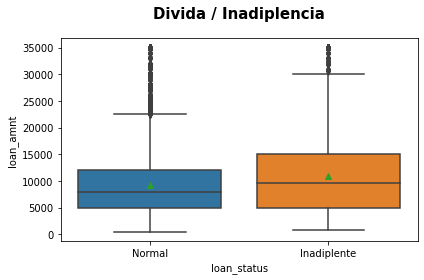

In [11]:
fig, ax = plt.subplots()

sns.boxplot(data.loan_status, data.loan_amnt, showmeans=True, ax=ax)
plt.xticks([0, 1], ['Normal', 'Inadiplente'])
ax.set_title('Divida / Inadiplencia',fontsize=15, fontweight='bold',pad=20)


plt.tight_layout()

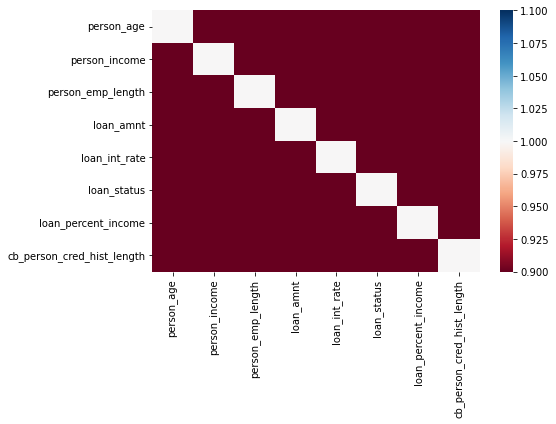

In [24]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu', vmin=1)

plt.tight_layout()
plt.show( )

## CONTAGEM DE REGISTRO NA CLASSE 0('PAGA EMPRESTIMO') E CLASSE 1('NAO PAGA EMPRESTIMO')

In [5]:
np.unique(data['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

## PODEMOS CONCLUIR QUE ESSA BASE DE DADOS CREDIT_RISK_DATASET, É UMA BASE DE DADOS DESVALANCEADA, POIS EXISTEM UMA QUANTIDADE DE PESSOAS 'QUE PAGA' É MAIOR QUE AS 'QUE NÃO PAGA'.

## ================================================================================================================================================================


## VISUALIZAÇÃO DE PESSOAS BOM PAGADOR E MAL PAGADOR

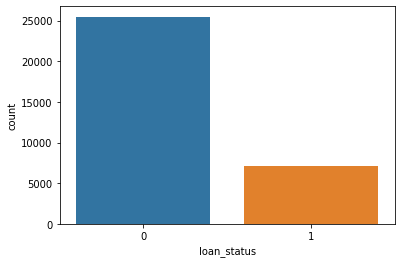

In [6]:
sns.countplot(x=data['loan_status']);

## SEPARAR OS DADOS EM INTERVALOS DE IDADE

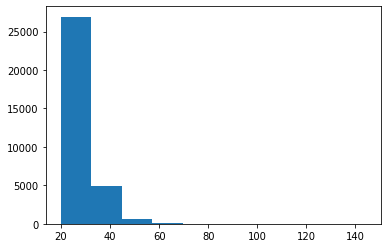

In [7]:
plt.hist(x=data['person_age']);

## CLASSIFICANDO POR GRUPO DE INGRESSOS.

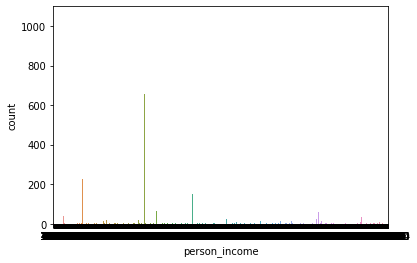

In [8]:
sns.countplot(x=data['person_income']);

## VISUALIZAÇÃO DE VALORES POR IDADE, INGRESSO, DIVIDA CLASSIFICANDO SE É OU NÃO BOM PAGADOR.

In [9]:
grafico = px.scatter_matrix(data, dimensions=['person_age','person_income', 'loan_amnt'], color='loan_status')
grafico.show()

## ================================================================================================================================================================

# VERIFICAÇÃO DE DADOS INCONSISTENTES

## VERIFICANDO EXISTENCIA DE IDADE MENOR IGUAL QUE 18 ANOS

In [10]:
data.loc[data['person_age']<=18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


## VERIFICANDO A EXISTENCIA DE IDADE MAIOR A 80


In [11]:
data.loc[data['person_age']>80].index

Int64Index([81, 183, 575, 747, 32297, 32416, 32506], dtype='int64')

## REGISTROS NO QUAL A IDADE SEJA MAIOR QUE 80 ANOS, SERÃO MUDADOS PARA UMA MEDIA DE 80 ANOS. PARA O ALGORITMO PODER APROVEITAR OS DADOS ENTREGUES.

In [12]:
data.loc[data['person_age']>80,'person_age'] = 80
data.loc[data['person_age']>79]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,80,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,80,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,80,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,80,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,80,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,80,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32506,80,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


## PODEMOS VISUALIZAR QUE OS REGUISTROS [81, 183, 575, 747, 32297, 32416, 32506] FORAM TROCADOS PARA 80.

## VERIFICANDO DIVIDA E RENDA MENOR QUE 0

In [13]:
data.loc[data['person_income']<=0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [14]:
data.loc[data['loan_amnt']<=0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


## NAO SE ENCONTRARAM VALORES MENOR QUE 0



# TRATAMENTO DE DADOS FALTANTES

## REEMPLAZAMOS OS DADOS FALTANTES PELA MEDIANA DA COLUNA.

In [16]:
data['person_emp_length'].fillna(data['person_emp_length'].mean(), inplace= True)
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace= True)

## VALORES PREENCHIDOS PELA MEDIA DA COLUMNA E VERIFICAMOS SE REALMENTE ACONTECEU O PREENCHIMENTO.

In [17]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# VISUALIZAREMOS NOVAMENTE OS DADOS CORREGIDOS.

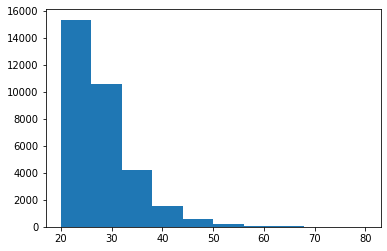

In [18]:
plt.hist(x=data['person_age']);

In [19]:
grafico = px.scatter_matrix(data, dimensions=['person_age','person_income', 'loan_amnt'], color='loan_status')
grafico.show()

## FOI CLASSIFICADO DE UMA MANEIRA MAIS ACERTIVA.

## ================================================================================================================================================================

## LEITURA DE COLUNAS

In [20]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## MODIFICAÇÃO DA ESTRUTURA DAS COLUNAS 

In [21]:
data2 = data[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate',  'loan_percent_income','cb_person_cred_hist_length', 
       'cb_person_default_on_file','loan_status']]

## ORGANIZAMOS COLUNAS COM NOSSA CATEGORIA TARGER 'LOAN_STATUS'.


In [22]:
data2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,3,Y,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,2,N,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,3,N,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,2,N,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,4,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,30,N,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,19,N,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,28,N,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,26,N,0


## DEFINIÇÃO DE PREVISORES

In [23]:
X_data = data2.drop('loan_status', axis = 1).values

In [24]:
X_data

array([[22, 59000, 'RENT', ..., 0.59, 3, 'Y'],
       [21, 9600, 'OWN', ..., 0.1, 2, 'N'],
       [25, 9600, 'MORTGAGE', ..., 0.57, 3, 'N'],
       ...,
       [65, 76000, 'RENT', ..., 0.46, 28, 'N'],
       [56, 150000, 'MORTGAGE', ..., 0.1, 26, 'N'],
       [66, 42000, 'RENT', ..., 0.15, 30, 'N']], dtype=object)

## PODEMOS OBSERVAR QUE ALGUMAS COLUNAS DOS NOSSOS DADOS PREVISORES ESTAO EXPRESSADOS EM CARACTERES, O QUE NOS IMPOSSIBILITA DE PODER USAR CORRETAMENTE ELES PARA NOSSO TREINAMENTO.


## DEFINIÇÃO DE CLASSE

In [25]:
y_data = data2.iloc[:,8]

## PODEMOS OBSERVAR QUE NOSSA CLASSE E CATEGORIA TARGET, SE ENCONTRA EM VALOR BINARIO, COISA QUE ELE NAO PRECISARIA TER UM TRATAMENTO PARA O TREINAMENTO.

In [26]:
y_data

0        0.59
1        0.10
2        0.57
3        0.53
4        0.55
         ... 
32576    0.11
32577    0.15
32578    0.46
32579    0.10
32580    0.15
Name: loan_percent_income, Length: 32581, dtype: float64

## COMO JA DEFINIMOS NOS DADOS PREVISORES, VIMOS QUE TEM COLUNAS NA QUAL O DADO ESTA EXPRESSADO EM STRINGS, PARA PODER OBTER UM MELHOR RESULTADO USANDO ELAS, PRECISAMOS TRANSFORMAR EM VALOR NUMERICO.

## VAMOS USAR UM LABELENCODER QUE SERVE PARA PODER TRATAR ATRIBUTOS CATEGORICOS.


In [27]:
from sklearn.preprocessing import LabelEncoder

le_pho = LabelEncoder()
le_li = LabelEncoder()
le_lg = LabelEncoder()
le_cb_pe = LabelEncoder()
le = LabelEncoder()

In [28]:
X_data[:, 2] = le_pho.fit_transform(X_data[:, 2])
X_data[:, 4] = le_li.fit_transform(X_data[:, 4])
X_data[:, 5] = le_lg.fit_transform(X_data[:, 5])
X_data[:, 10] = le_cb_pe.fit_transform(X_data[:,10])

In [29]:
from sklearn import utils

In [30]:

training_scores_encoded = le.fit_transform(y_data)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_data))
print(utils.multiclass.type_of_target(y_data.astype('int')))
print(utils.multiclass.type_of_target(y_data))

[59 10 57 ... 46 10 15]
continuous
binary
continuous


In [34]:
type(X_data)

numpy.ndarray

## VISUALIZAÇÃO DE X_data 

In [31]:
X_data

array([[22, 59000, 3, ..., 0.59, 3, 1],
       [21, 9600, 2, ..., 0.1, 2, 0],
       [25, 9600, 0, ..., 0.57, 3, 0],
       ...,
       [65, 76000, 3, ..., 0.46, 28, 0],
       [56, 150000, 0, ..., 0.1, 26, 0],
       [66, 42000, 3, ..., 0.15, 30, 0]], dtype=object)

## PODEMOS OBSERVAR QUE X_data, JA FOI CONVERTIDO PARA VALORES NUMERICOS, MAS ELE VEM DE UMA FORMA NAO PADRONIZADA.

## ============================================================================================================================

In [32]:
tree_credit_risk = DecisionTreeClassifier(criterion='entropy')


In [33]:
tree_credit_risk.fit(X_data, y_data)

ValueError: ignored

In [ ]:
type(y_data)

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)


In [ ]:
X_data

array([[-0.91858491, -0.11414329,  0.92372028, ..., -0.69155444,
         2.16129414,  1.89306854],
       [-1.07902199, -0.91114671,  0.22592917, ..., -0.93816728,
        -0.46268575, -0.52824289],
       [-0.43727366, -0.91114671, -1.16965304, ..., -0.69155444,
        -0.46268575,  1.89306854],
       ...,
       [ 5.98020967,  0.16012914,  0.92372028, ...,  5.47376651,
        -0.46268575,  1.89306854],
       [ 4.53627592,  1.35402091, -1.16965304, ...,  4.98054084,
        -0.46268575, -0.52824289],
       [ 6.14064676, -0.38841572,  0.92372028, ...,  5.96699219,
        -0.46268575, -0.52824289]])

TREINAMENTO E TESTE


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_data_treinamento, X_data_teste, y_data_treinamento, y_data_teste = train_test_split(X_data, y_data, test_size= 0.25, random_state= 0)

In [ ]:
X_data_treinamento.shape

(24435, 12)

In [ ]:
X_data_teste.shape

(8146, 12)

In [ ]:
X_data_teste.shape, y_data_teste.shape

((8146, 12), (8146,))

In [ ]:
import pickle

In [ ]:
with open('c_r.pkl', mode = 'wb') as f:
  pickle.dump([X_data_treinamento, y_data_treinamento, X_data_teste, y_data_teste], f)

CARREGANDO PICKLE

In [ ]:
with open('c_r.pkl', 'rb') as f:
  X_data_treinamento, y_treinamento, X_data_teste, y_teste = pickle.load(f)

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
naive_c_data = GaussianNB()
naive_c_data.fit(X_data_treinamento, y_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_c_data.predict(X_data_teste)

In [ ]:
previsoes

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_teste, previsoes)

1.0

In [ ]:
confusion_matrix(y_teste, previsoes)

array([[5621,    0],
       [   0, 1539]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

1.0

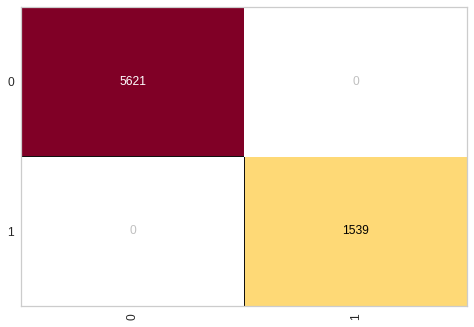

In [ ]:
cm = ConfusionMatrix(naive_c_data)
cm.fit(X_data_treinamento, y_treinamento)
cm.score(X_data_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5621
           1       1.00      1.00      1.00      1539

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160





1.   BALANCEAMENTO
2.   CROSS_VAL
3.   REGRESSAO LOGISTICA

